<a href="https://colab.research.google.com/github/bkytpe/ML2020/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ml1216/raw/main/train.csv"
urlretrieve(url,"train.csv")
url = "https://github.com/Elwing-Chou/ml1216/raw/main/test.csv"
urlretrieve(url,"test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f296b7893c8>)

In [136]:
import pandas as pd
train = pd.read_csv("train.csv", encoding = "utf-8")
test = pd.read_csv("test.csv", encoding = "utf-8")

In [137]:
#填補缺失值
#use as many data as possible

In [138]:
#把train & test合在一起
datas = pd.concat([train, test],axis = 0, ignore_index=True) 
datas = datas.drop(["PassengerId","Survived"], axis = 1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [139]:
#看那些欄位有空值
s = datas.isna().sum() #空值回傳True
#series[跟資料筆數一樣多的true/false]
s[s > 0].sort_values(ascending = False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [140]:
#處理 ticket
#算出有哪些人共用ticket
count = datas["Ticket"].value_counts()
def share(tn):
    return count[tn]
datas["Ticket"]=datas["Ticket"].apply(share)

In [141]:
#處理Pclass
#取中位數
med = datas.median().drop("Pclass") #小心有類別變數，drop("Pclass") 

In [142]:
#把空值全部填入中位數
datas = datas.fillna(med)

In [143]:
#處理Embarked
#用most填入空值
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

In [144]:
#處理 Cabin 
# let空值be None
def cabin(c):
    if pd.isna(c):
        return None
    else:
        return c[0]
datas["Cabin"] = datas["Cabin"].apply(cabin)

In [145]:
#處理name，目標是取出稱謂
def namecut(n):
    n = n.split(",")[-1].split(".")[0]
    return n.strip() #strip:丟掉左右兩邊空白
count = datas["Name"].apply(namecut).value_counts()
# ['Mr', 'Miss', 'Mrs', 'Master']
reserved = count[:4].index

def namecut(n):
    n = n.split(",")[-1].split(".")[0]
    n = n.strip()
    if n in reserved:
        return n
    else:
        return None
datas["Name"] = datas["Name"].apply(namecut) 

In [146]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,1,8.0500,None,S
1305,1,None,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,None,S
1307,3,Mr,male,28.0,0,0,1,8.0500,None,S


In [147]:
#對Pclass編碼
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas,columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [148]:
#Sibsp, Parch, 多給一個[合在一起]的選擇(可增加欄位，不要刪除欄位)
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [149]:
#組合式演算法(ensemble):多個分類器
#iloc第幾列
#iloc:[1st,2nd,...]
x_train = datas.iloc[:len(train)]
y_train = train["Survived"]
x_test = datas.iloc[len(train):]
x_test

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
891,34.5,0,0,1,7.8292,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
892,47.0,1,0,1,7.0000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
893,62.0,0,0,1,9.6875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
894,27.0,0,0,1,8.6625,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
895,22.0,1,1,2,12.2875,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [150]:
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve
#cv = 10，分為十個隨機森林，每個吃不同資料進去訓練
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":range(15, 35),
    "max_depth":range(5, 9)
}
clf = RandomForestClassifier() #模型本人
search = GridSearchCV(clf,params, n_jobs = -1, cv = 10)
search.fit(x_train, y_train)
print(search.best_score_)
print(search.best_params_)

0.8440074906367041
{'max_depth': 7, 'n_estimators': 26}


In [151]:
#cross_val_score哪個森林表現好?
import numpy as np
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators = 25, max_depth  = 7)
scores = cross_val_score(clf,x_train,y_train,n_jobs = -1,cv= 5)
print("scores:",scores)
print("Avg score:",np.average(scores))

scores: [0.83240223 0.80898876 0.83707865 0.80337079 0.83707865]
Avg score: 0.8237838177138912


In [158]:
clf = RandomForestClassifier(n_estimators = 25, max_depth  = 7)
clf.fit(x_train,y_train)
pre = clf.predict(x_test)
df = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)

In [161]:
pd.DataFrame(
    {"columns":datas.columns,
     "importance":clf.feature_importances_}
).sort_values(["importance"],ascending = False)


,columns,importance
10,Sex_male,0.144719
7,Name_Mr,0.136291
9,Sex_female,0.130076
4,Fare,0.089778
3,Ticket,0.074127
24,Pclass_3,0.072350
0,Age,0.064347
8,Name_Mrs,0.043892
25,Family,0.042035
22,Pclass_1,0.036259


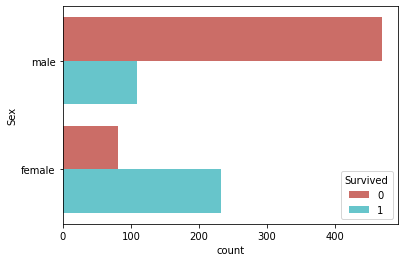

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y = train["Sex"],hue = train["Survived"],palette = "hls")

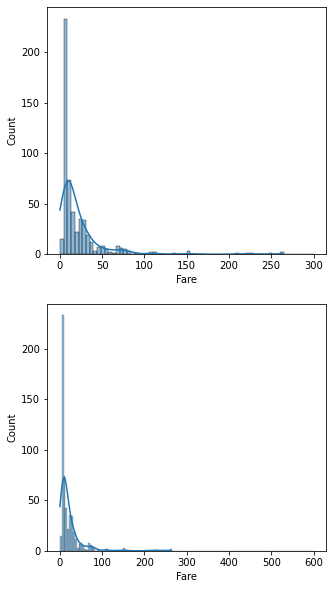

In [186]:
#kde curve機率曲線
dead = train[train["Survived"]==0]
alive = train[train["Survived"]!=0]
plt.figure(figsize = (5,10))
plt.subplot(2,1,1)
sns.histplot(dead["Fare"],binrange = (0,300),kde = True)
plt.subplot(2,1,2)
sns.histplot(dead["Fare"],binrange = (0,600),kde = True)
#sns.pairplot(train, x_vars = ["Fare"],y_vars = ["Survived"],kind = "hist")

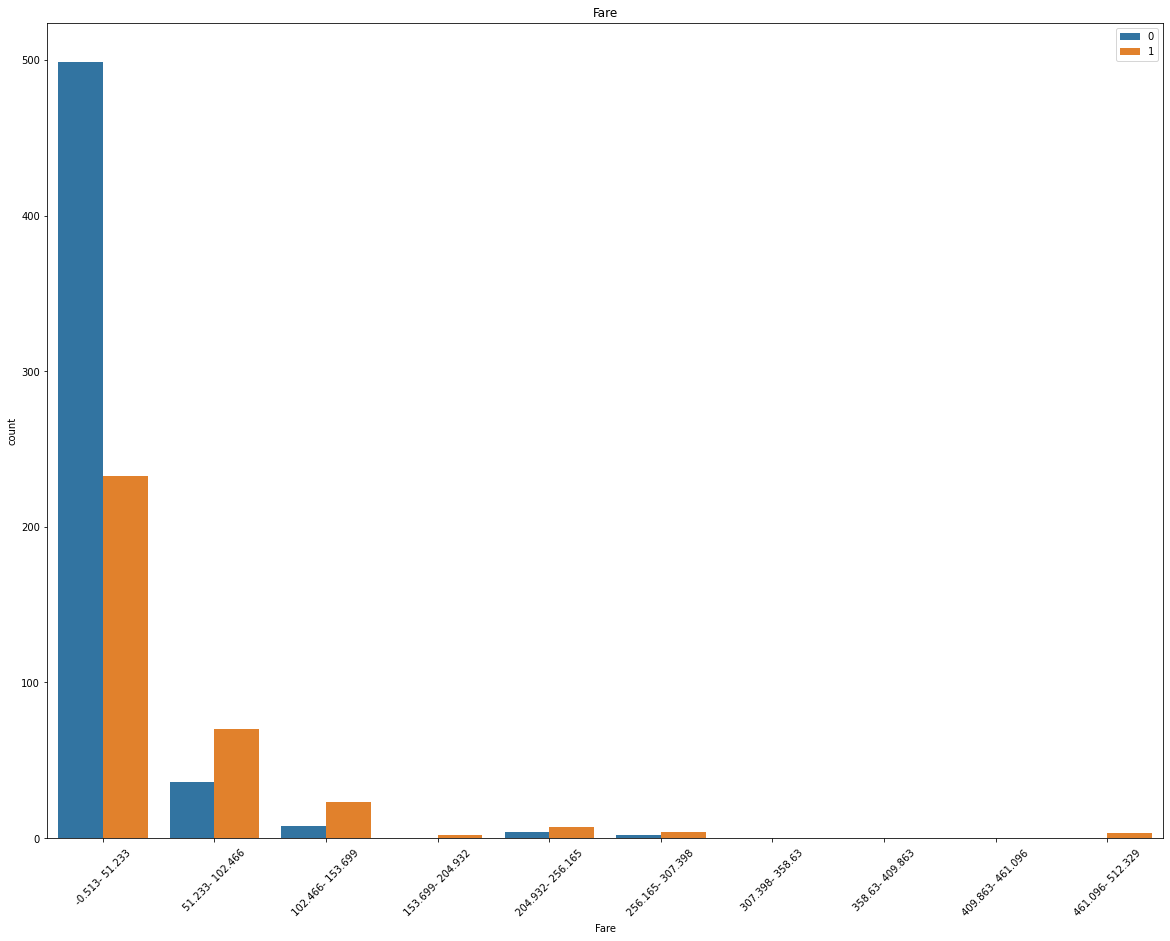

In [200]:
def trans(s):
    s = str(s)
    return s.replace("("," ").replace("]", " ").replace(",","-")
c = pd.cut(train["Fare"],bins = 10,include_lowest=True)
c = c.apply(trans)
plt.figure(figsize = (20,15))
p = sns.countplot(x = c,hue = train["Survived"])
plt.title("Fare")
plt.xticks(rotation = 45)
p.legend(loc = "upper right")

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
print(len(clf.estimators_))

plt.figure(figsize = (15,15)) #控圖大小 in inch
tree = plot_tree(clf.estimators_[0], 
          feature_names = datas.columns,
          class_names = ["Dead","Alive"],
          max_depth = 2,
          filled =True)
plt.show()

In [154]:
from sklearn.preprocessing import MinMaxScaler
# iloc: [1st, 2nd, ....]
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
datas_scale = pd.DataFrame(datas_scale, columns=datas.columns)
x_train_scale = datas_scale.iloc[:len(train)]
x_test_scale = datas_scale.iloc[len(train):]
x_test_scale

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
891,0.430039,0.000,0.000000,0.0,0.015282,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
892,0.586622,0.125,0.000000,0.0,0.013663,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
893,0.774521,0.000,0.000000,0.0,0.018909,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
894,0.336089,0.000,0.000000,0.0,0.016908,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
895,0.273456,0.125,0.111111,0.1,0.023984,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [155]:
from sklearn.neighbors import KNeighborsClassifier
params = {
   "n_neighbors":range(5, 100)
}
clf = KNeighborsClassifier()
search = GridSearchCV(clf, params, n_jobs=-1, cv=10)
search.fit(x_train_scale, y_train)
print(search.best_score_)
print(search.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [157]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train_scale, y_train)
pre = clf.predict(x_test_scale)
df = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)